In [1]:
import pandas as pd #pd is the alias
import numpy as np 
import datetime
from os import listdir 
from os.path import isfile, join
import glob 
import re
import plotly.graph_objects as go
import matplotlib.pyplot as plt # Use for plotting. "plt" is an alias for calling matplotlib.pyplot
from matplotlib import style # to set the grid style 
import matplotlib.animation as animation
%matplotlib inline

In [2]:
#read csv file
df = pd.read_csv("batch_inforamtion.csv")
df

,Unnamed: 0,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program
0,0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN
1,1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
2,2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN
3,3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
...,...,...,...,...,...,...,...,...,...,...,...
160,160,8/28/2020 12:15:37,souravkr2025@gmail.com,Sourav Kumar Dan,3.0,4.0,4.0,Yes,NaN,No,NaN
161,161,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No
162,162,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.
163,163,8/28/2020 21:19:05,titutitasdey@gmail.com,Titas Dey,5.0,5.0,5.0,Maybe,NaN,Maybe,NaN


In [3]:
#drop unnamed :0 columns
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
...,...,...,...,...,...,...,...,...,...,...
160,8/28/2020 12:15:37,souravkr2025@gmail.com,Sourav Kumar Dan,3.0,4.0,4.0,Yes,NaN,No,NaN
161,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No
162,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.
163,8/28/2020 21:19:05,titutitasdey@gmail.com,Titas Dey,5.0,5.0,5.0,Maybe,NaN,Maybe,NaN


In [5]:
#total columns
df.columns

Index(['Timestamp', 'Email', 'Name', 'UderstandingTopic(0-5)',
       'TrainingRating(0-5)', 'Student_queries_sloved(0-5)',
       'want_join_full_time_courses', 'recommend_course',
       'want_apply_paid_intership', 'suggestions_improving_program'],
      dtype='object')

In [6]:
df

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
...,...,...,...,...,...,...,...,...,...,...
160,8/28/2020 12:15:37,souravkr2025@gmail.com,Sourav Kumar Dan,3.0,4.0,4.0,Yes,NaN,No,NaN
161,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No
162,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.
163,8/28/2020 21:19:05,titutitasdey@gmail.com,Titas Dey,5.0,5.0,5.0,Maybe,NaN,Maybe,NaN


In [7]:
#all data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      163 non-null    object 
 1   Email                          163 non-null    object 
 2   Name                           163 non-null    object 
 3   UderstandingTopic(0-5)         163 non-null    float64
 4   TrainingRating(0-5)            163 non-null    float64
 5   Student_queries_sloved(0-5)    163 non-null    float64
 6   want_join_full_time_courses    163 non-null    object 
 7   recommend_course               67 non-null     object 
 8   want_apply_paid_intership      163 non-null    object 
 9   suggestions_improving_program  77 non-null     object 
dtypes: float64(3), object(7)
memory usage: 13.0+ KB


# Null Value Check every columns wise

In [8]:
#checking Timestamps null values
df[df['Timestamp'].isnull()]

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#check total null values
df.isna().sum()

Timestamp                         2
Email                             2
Name                              2
UderstandingTopic(0-5)            2
TrainingRating(0-5)               2
Student_queries_sloved(0-5)       2
want_join_full_time_courses       2
recommend_course                 98
want_apply_paid_intership         2
suggestions_improving_program    88
dtype: int64

In [10]:
# using dropna() function where every columns values are null  
df1 = df.dropna(how = 'all')

In [11]:
df1.isna().sum()

Timestamp                         0
Email                             0
Name                              0
UderstandingTopic(0-5)            0
TrainingRating(0-5)               0
Student_queries_sloved(0-5)       0
want_join_full_time_courses       0
recommend_course                 96
want_apply_paid_intership         0
suggestions_improving_program    86
dtype: int64

In [12]:
df1

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
...,...,...,...,...,...,...,...,...,...,...
160,8/28/2020 12:15:37,souravkr2025@gmail.com,Sourav Kumar Dan,3.0,4.0,4.0,Yes,NaN,No,NaN
161,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No
162,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.
163,8/28/2020 21:19:05,titutitasdey@gmail.com,Titas Dey,5.0,5.0,5.0,Maybe,NaN,Maybe,NaN


In [13]:
df2 = df1.dropna(subset=['suggestions_improving_program'])
df2.head()

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
6,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.
7,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...


here suggestions improving program columns all null values has been droped for better output

In [14]:
#reset index
df3 = df2.reset_index(drop=True)

In [15]:
df3

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program
0,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
1,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
2,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
3,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.
4,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...
...,...,...,...,...,...,...,...,...,...,...
72,8/27/2020 23:36:00,sohamsengupta44@gmail.com,Soham Sen Gupta,5.0,5.0,5.0,Maybe,NaN,Maybe,I think it is completely ok. Very Very intere...
73,8/27/2020 23:55:56,sohinip815@gmail.com,Sohini Pal,3.0,4.0,4.0,Maybe,NaN,No,Increase the workshop day..so that it covers u...
74,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No
75,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.


In [16]:
# !pip install wordcloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# Start with one review:
text = df3.suggestions_improving_program[2]
print(text)

I want to know if you r going to tell us how to create app like shankha da present after session


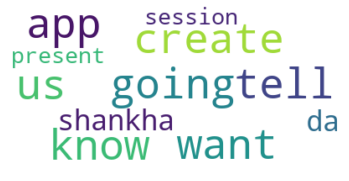

In [18]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

only one review files wordcloud has been shown

In [19]:
# Save the image in the img folder:
wordcloud.to_file("first_review.png")

In [20]:
text = " ".join(suggestions for suggestions in df3.suggestions_improving_program)
print ("There are {} words in the combination of all suggestions improving programs.".format(len(text)))

There are 6444 words in the combination of all suggestions improving programs.


In [21]:
#here are the all text from the suggestions improvings programms
text

'NO All is well I want to know if you r going to tell us how to create app like shankha da present after session No suggestions. I just want to know that we can build our own app like shankha da present us after session on a dam project on a synthetic data set The free boot camp was really great. Whatever lessons on R was given was really helpful. Thank you This bootcamp was amazing, faculties are so friendly & well behaved, according to me there is no need of improving the training program,this was at its best  As per my suggestion, the way you guys are approaching is really good and I am quite sure you will carry on this quality of training in future. Al the best. Everything was smooth So far its good. After all its a very great and very helpful session for me....Mainly as a friendly teaching process....Thanking you Surya Da(Rittik Da,Sankhadeep Da,Rishikesh Da)... It\'s very good, but I think if I had prior knowledge on coding then it would be more easy to understand This is complet

In [22]:
# Create stopword list:
stopwords = set(STOPWORDS)
print(stopwords)
#custom stopword also can add
stopwords.update(["I\'d", "so", "that"])
print(stopwords)

{'ourselves', 'there', 'like', 'then', "you're", 'those', "here's", 'have', 'themselves', "that's", 'an', 'how', 'if', 'same', "aren't", "when's", 'himself', 'by', 'do', "why's", "they'd", "shouldn't", 'very', 'com', 'down', 'over', 'until', "he's", 'why', 'nor', "he'd", 'shall', "wouldn't", "can't", 'www', 'out', 'does', "let's", "wasn't", 'in', 'and', "isn't", 'otherwise', 'should', "they've", "he'll", 'his', 'here', 'below', 'k', 'to', 'each', "haven't", 'again', "doesn't", 'was', 'would', 'before', 'some', 'where', 'the', "hasn't", "weren't", 'further', "hadn't", 'from', "i'll", 'we', 'had', "they're", 'is', 'off', "she'd", 'only', 'for', 'its', 'me', 'them', "we'll", "where's", "how's", 'itself', 'however', "you've", 'these', "we'd", 'ought', 'hers', 'it', "mustn't", 'with', 'that', 'doing', "i'd", 'or', 'just', 'am', 'no', 'herself', 'too', 'under', "i'm", 'most', 'did', 'above', 'which', 'being', 'ours', 'been', 'were', 'can', 'since', 'your', 'my', 'at', 'a', "what's", 'all', '

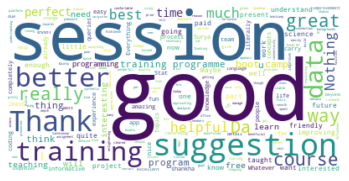

In [23]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

this is the wordcloud from suggestions improving columns

In [24]:
df3

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program
0,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
1,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
2,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
3,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.
4,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...
...,...,...,...,...,...,...,...,...,...,...
72,8/27/2020 23:36:00,sohamsengupta44@gmail.com,Soham Sen Gupta,5.0,5.0,5.0,Maybe,NaN,Maybe,I think it is completely ok. Very Very intere...
73,8/27/2020 23:55:56,sohinip815@gmail.com,Sohini Pal,3.0,4.0,4.0,Maybe,NaN,No,Increase the workshop day..so that it covers u...
74,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No
75,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.


In [25]:
df3[df3['suggestions_improving_program'].isnull()]
#checking is there any null values in suggestions improving columns

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program


In [26]:
# !pip install textblob
from textblob import TextBlob
import nltk

# Sentiment Analysis has been done using Textblob  

In [27]:
def sentiment_analysis(text):
    '''
    this the sentiment analysis functions where text is parameter values
    from text creating obj then use sentiment polarity
    '''
    obj = TextBlob(text)
    sentiment = obj.sentiment.polarity
    #print(sentiment)
    if sentiment == 0:
        #print("the text is neutral")
        return "neutral"
    elif sentiment > 0:
        #print("the text is good")
         return "good"
    else:
        #print("the text is bad")
         return "bad"

In [28]:
sentiment_analysis("course was outstanding")

'good'

# Sentiment analysis and categorizing the comments between good, bad and neutral

In [29]:
#apply the functions here for makeing new columns sentiment analysis
df3['sentiment_analysis'] = df3.apply(lambda row : sentiment_analysis(row['suggestions_improving_program']), axis = 1)
df3

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program,sentiment_analysis
0,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO,neutral
1,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well,neutral
2,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...,neutral
3,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.,neutral
4,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...,good
...,...,...,...,...,...,...,...,...,...,...,...
72,8/27/2020 23:36:00,sohamsengupta44@gmail.com,Soham Sen Gupta,5.0,5.0,5.0,Maybe,NaN,Maybe,I think it is completely ok. Very Very intere...,good
73,8/27/2020 23:55:56,sohinip815@gmail.com,Sohini Pal,3.0,4.0,4.0,Maybe,NaN,No,Increase the workshop day..so that it covers u...,good
74,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No,neutral
75,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.,good


We are adding columns with name of sentiment analysis. if we look on the data we can see that there is only available data is good and neutral no bad review was not there.

In [30]:
#counting the sentiment analysis based on suggestions improving programm
df4 = df3.groupby('sentiment_analysis')['sentiment_analysis'].agg('count')
sentiment_analysis= pd.DataFrame(df4)
sentiment_analysis

,sentiment_analysis
sentiment_analysis,
good,61
neutral,16


In [31]:
#renameing to total_counts of sentiment_analysis data
sentiment_analysis.rename(columns={"sentiment_analysis": "counts"},inplace=True)
sentiment_analysis

,counts
sentiment_analysis,
good,61
neutral,16


In [32]:
#reset the index for getting better result
sentiment_analysis.reset_index(inplace=True)
sentiment_analysis

,sentiment_analysis,counts
0,good,61
1,neutral,16


In [33]:
#importing library 
#!pip install plotly
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [34]:
def draw_trace_bar(data,data_index, feature, title, xlab, ylab,color='Blue'):
    '''
    this is the function created using plotly for draw a trace bar where
    data is main dataframe
    data index is x label values
    feature is y label values
    '''
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data[data_index],
            y = data[feature],
            marker=dict(color=color),
            text=data[data_index]
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=10,
                            color='red'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
              hovermode = 'closest'
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')

In [35]:
draw_trace_bar(sentiment_analysis,'sentiment_analysis','counts','Suggestions from student about program', 'Sentiment','Total counts based on sentiment analysis',"lightgreen")

above chart showing that in the batch informations dataset most of suggestions iproving programs comments was good(61), neutral(16)
from the total comments of 77.

# Based on the ratings give a conclusion How well students are understanding the covered topics

In [36]:
# using dropna() function    
df6 = df.dropna(how = 'all')

In [37]:
#checking the totals null valuse sum
df6.isna().sum()

Timestamp                         0
Email                             0
Name                              0
UderstandingTopic(0-5)            0
TrainingRating(0-5)               0
Student_queries_sloved(0-5)       0
want_join_full_time_courses       0
recommend_course                 96
want_apply_paid_intership         0
suggestions_improving_program    86
dtype: int64

In [38]:
df6.head()

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...


In [39]:
#from understanding columns groupby using count
df7 = df6.groupby('UderstandingTopic(0-5)')['UderstandingTopic(0-5)'].agg('count')
UderstandingTopic= pd.DataFrame(df7)
UderstandingTopic

,UderstandingTopic(0-5)
UderstandingTopic(0-5),
1.0,2
2.0,2
3.0,11
4.0,58
5.0,90


In [40]:
#renameing the counts for better understanding
UderstandingTopic.rename(columns={"UderstandingTopic(0-5)": "counts"},inplace=True)
UderstandingTopic

,counts
UderstandingTopic(0-5),
1.0,2
2.0,2
3.0,11
4.0,58
5.0,90


In [41]:
UderstandingTopic.reset_index(inplace=True)

In [42]:
UderstandingTopic

,UderstandingTopic(0-5),counts
0,1.0,2
1,2.0,2
2,3.0,11
3,4.0,58
4,5.0,90


In [43]:
#here is the trace bar for understand the program topics
draw_trace_bar(UderstandingTopic,'UderstandingTopic(0-5)','counts','How Well Students understands the program topic well based on their ratings', 'Rating From(1-5)','Total counts based on Rating',"lightgreen")

above chart showing that in the batch informations dataset most of students ratings about the students understands program topics 
where we can see that most of the students give(90) 5 star ratings according to 4 star rating(58), 3 star ratting(3),2 star ratting(2), 1 star ratting(2) from total rattings 163 rattings.
Finally we can say that most of the students understand our programms topics verry well

# Based on the ratings give a conclusion how good our course was

In [44]:
#training ratting columns group by for total counts 
df8 = df6.groupby('TrainingRating(0-5)')['TrainingRating(0-5)'].agg('count')
TrainingRating= pd.DataFrame(df8)

In [45]:
#renameing and reset index for data visualizeing
TrainingRating.rename(columns={"TrainingRating(0-5)": "counts"},inplace=True)
TrainingRating.reset_index(inplace=True)

In [46]:
TrainingRating

,TrainingRating(0-5),counts
0,1.0,3
1,2.0,3
2,3.0,6
3,4.0,44
4,5.0,107


In [47]:
#drawing the bar for training rattings
draw_trace_bar(TrainingRating,'TrainingRating(0-5)','counts','How Well Students understands and Rate our way of training', 'Rating From(1-5)','Total counts based on Rating',"lightgreen")

above chart showing that in the batch informations dataset most of students ratings about the training program ratting where we can see that most of the students give(107) 5 star ratings according to 4 star rating(44), 3 star ratting(6),2 star ratting(3), 1 star ratting(3) from total rattings 163 rattings. Finally we can say that most of the students like our training programms verry well

# Based on the ratings give a conclusion how well students queries are getting solved column

In [48]:
#groupby students quires columns and count them 
df9 = df6.groupby('Student_queries_sloved(0-5)')['Student_queries_sloved(0-5)'].agg('count')
Student_queries_sloved= pd.DataFrame(df9)
#rename to the counts for better understanding
Student_queries_sloved.rename(columns={"Student_queries_sloved(0-5)": "counts"},inplace=True)
Student_queries_sloved.reset_index(inplace=True)
Student_queries_sloved

,Student_queries_sloved(0-5),counts
0,1.0,2
1,2.0,3
2,3.0,5
3,4.0,40
4,5.0,113


In [49]:
#drwaing bar for how students quireies are solved by our instructors
draw_trace_bar(Student_queries_sloved,'Student_queries_sloved(0-5)','counts','How Well Students queries are solved by ours trainers', 'Rating From(1-5)','Total counts based on Rating',"lightgreen")

above chart showing that in the batch informations dataset most of students ratings about their queries are solved by ours instructors where we can see that most of the students give(113) 5 star ratings according to 4 star rating(40), 3 star ratting(5),2 star ratting(3), 1 star ratting(2) from total rattings 163 rattings. Finally we can say that most of the students queries are solved by ours instructors and they also satisfied by our services

# how many students are interested in applying for the paid internship

In [50]:
#checking null values
df6.isna().sum()

Timestamp                         0
Email                             0
Name                              0
UderstandingTopic(0-5)            0
TrainingRating(0-5)               0
Student_queries_sloved(0-5)       0
want_join_full_time_courses       0
recommend_course                 96
want_apply_paid_intership         0
suggestions_improving_program    86
dtype: int64

In [51]:
df6.head()

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...


In [52]:
#groupby and counts total
df10 = df6.groupby('want_apply_paid_intership')['want_apply_paid_intership'].agg('count')
paid_internship= pd.DataFrame(df10)
paid_internship

,want_apply_paid_intership
want_apply_paid_intership,
Maybe,81
No,40
Yes,41
qt,1


In [53]:
#renameing to the counts
paid_internship.rename(columns={"want_apply_paid_intership": "counts"},inplace=True)
paid_internship.reset_index(inplace=True)

In [54]:
paid_internship

,want_apply_paid_intership,counts
0,Maybe,81
1,No,40
2,Yes,41
3,qt,1


In [55]:
paid_internship.iloc[[3]]

,want_apply_paid_intership,counts
3,qt,1


In [56]:
#removing the index 3 where value has no meanings
paid_internship1 = paid_internship.drop(paid_internship.index[[3]])
paid_internship1

,want_apply_paid_intership,counts
0,Maybe,81
1,No,40
2,Yes,41


In [57]:
#bar chart for paid internship
draw_trace_bar(paid_internship1,'want_apply_paid_intership','counts','Students are interested in paid internship or not?', 'Yes-interested, No-not interested, Maybe-less interested','Total counts based on interested',"lightgreen")

above chart showing that in the batch informations dataset most of the students are less interested in paid internship their opinion was maybe(81), then want to apply paid internship second highest(41) and 40 students says No

#  Correlation between their positive reply in applying for internship and course quality

In [59]:
df6.head()

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...


taking the stundets who are interested in paid internship for how well they response in our program

In [60]:
df11 = df6[df6["want_apply_paid_intership"]== "Yes"]

In [61]:
df11.shape

(41, 10)

In [62]:
df11.head()

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
6,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.
7,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...


In [63]:
#groupby and count them
df12 = df11.groupby('UderstandingTopic(0-5)')['UderstandingTopic(0-5)'].agg('count')
UderstandingTopic_internship= pd.DataFrame(df12)
UderstandingTopic_internship

,UderstandingTopic(0-5)
UderstandingTopic(0-5),
1.0,1
3.0,2
4.0,14
5.0,24


In [64]:
#reseting index
UderstandingTopic_internship.rename(columns={"UderstandingTopic(0-5)": "counts"},inplace=True)
UderstandingTopic_internship.reset_index(inplace=True)

In [65]:
UderstandingTopic_internship

,UderstandingTopic(0-5),counts
0,1.0,1
1,3.0,2
2,4.0,14
3,5.0,24


In [66]:
#bar chart for students who are interested in paid internship and their activities in program.
draw_trace_bar(UderstandingTopic_internship,'UderstandingTopic(0-5)','counts','Students are interested in paid internship and their ratings about the course understanding topics', 'Ratiing(0-5)','Total counts based on ratiings',"lightgreen")

above chart showing that in the batch informations dataset students who are interested in paid internship from them, most of students ratings about the students understands program topics where we can see that most of the students give(24) 5 star ratings according to 4 star rating(14), 3 star ratting(2),2 star ratting(0), 1 star ratting(1) from total rattings 41 rattings.
Finally the corelations between their positive reply for paid internship and course quality where students who are interested in paid intenship they actually give the good feedback about their understanding our programs. 

In [67]:
df3.head()

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program,sentiment_analysis
0,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO,neutral
1,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well,neutral
2,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...,neutral
3,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.,neutral
4,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...,good


In [68]:
df3.sentiment_analysis.unique()

array(['neutral', 'good'], dtype=object)

In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
# Look at classification type counts
counts = df3.sentiment_analysis.value_counts()
print(len(counts))
print(counts)

2
good       61
neutral    16
Name: sentiment_analysis, dtype: int64


In [71]:
# Get classification types where counts are over 100
#types = np.asarray(counts[(counts > 1000)].index)
types=['good'
,'neutral'
]

# Filter dataset's records for classification types > 100
data = df3[df3.sentiment_analysis.isin(types)]
print(types)
print(len(types))
print('%d is the number of records in the final filtered dataset' %data.shape[0])

['good', 'neutral']
2
77 is the number of records in the final filtered dataset


In [72]:
train=data
a=train.sentiment_analysis.unique()
l=len(train.sentiment_analysis.unique())
print(a)
print(len(a))

['neutral' 'good']
2


In [73]:
for i in range (l):
    train.sentiment_analysis = train.sentiment_analysis.replace(a[i], i)

In [74]:
train.reset_index(drop=True)

,Timestamp,Email,Name,UderstandingTopic(0-5),TrainingRating(0-5),Student_queries_sloved(0-5),want_join_full_time_courses,recommend_course,want_apply_paid_intership,suggestions_improving_program,sentiment_analysis
0,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO,0
1,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well,0
2,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...,0
3,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.,0
4,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...,1
...,...,...,...,...,...,...,...,...,...,...,...
72,8/27/2020 23:36:00,sohamsengupta44@gmail.com,Soham Sen Gupta,5.0,5.0,5.0,Maybe,NaN,Maybe,I think it is completely ok. Very Very intere...,1
73,8/27/2020 23:55:56,sohinip815@gmail.com,Sohini Pal,3.0,4.0,4.0,Maybe,NaN,No,Increase the workshop day..so that it covers u...,1
74,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No,0
75,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.,1


In [75]:
train.sentiment_analysis

0     0
1     0
2     0
3     0
4     1
     ..
72    1
73    1
74    0
75    1
76    1
Name: sentiment_analysis, Length: 77, dtype: int64

In [76]:
train.sentiment_analysis.value_counts()

1    61
0    16
Name: sentiment_analysis, dtype: int64

In [77]:
df111 = train
df444 = df111[['suggestions_improving_program','sentiment_analysis']]
df444.reset_index(drop =True)

,suggestions_improving_program,sentiment_analysis
0,NO,0
1,All is well,0
2,I want to know if you r going to tell us how t...,0
3,No suggestions.,0
4,I just want to know that we can build our own ...,1
...,...,...
72,I think it is completely ok. Very Very intere...,1
73,Increase the workshop day..so that it covers u...,1
74,No,0
75,The training programme was quite good.,1


In [78]:
X=df444['suggestions_improving_program']
Y=df444['sentiment_analysis']

In [79]:
# 3). ----- Train Test Split -----

# Split Data
X_train, X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.10, random_state = 1)

# Create a Count Vectorizer to gather the unique elements in sequence
vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (4,4))

# Fit and Transform CountVectorizer
vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

#Print a few of the features
print(vect.get_feature_names()[-20:])

['worl', 'woul', 'xcel', 'xper', 'xpla', "y's ", 'y..s', 'ya..', 'ybe ', 'ybe"', 'ynth', 'yond', 'yone', 'you ', 'you.', 'your', 'ysis', 'ythi', 'zati', 'zing']


In [80]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [81]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(X_train)
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

In [82]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
# print(SVM)
SVM.fit(X_train, y_train)
# print(X_test)
# predict the labels on validation dataset
predicted_classes = SVM.predict(X_test)
print(predicted_classes)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predicted_classes, y_test))

[1 1 1 0 1 0 1 1]
SVM Accuracy Score ->  0.875
